<a href="https://colab.research.google.com/github/hazelchiang2102/ADALL_github/blob/main/Adall_project_draft_2501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/hazelchiang2102/ADALL_github/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
try:
    df = pd.read_csv(github_raw_url)
    print("Successfully loaded data from GitHub!")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from GitHub!


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [ ]:
#generate a preview of ten rows as text first, so that we can use it for sending to LLM API later.
data_preview = df.head(10).to_string()
print(data_preview)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0                   0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0
3              0.0     1.0       0.0        

In [ ]:
#sending to LLM API
#generate a preview of ten rows as text first, so that we can use it for sending to LLM API later.
data_preview = df.head(10).to_string()
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Use ONLY the information inside the dataset profile text.
Do NOT invent correlations, columns, or values.
If something is not in the dataset profile, state 'Not shown in profile'.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""Dataset info: {data_preview}\n
    Context:
    The business problem is to identify individuals at high risk of diabetes early and to predict the likelihood of diabetes using non-invasive, survey-based indicators (e.g. BMI, blood pressure, lifestyle habits), so that preventive interventions can be prioritised.\n
    Questions
    1. Based on the context and dataset info, how should i approach modelling objective? focus on problem framing aspects.
    2. What would be the most meaningful target?
    3. What would be most important metric for scoring?
    4. What are the top 3 most potentially important features?
    """)
print(response.output_text)

Below are concise, profile-grounded answers to each question. I only use information present in the dataset profile and the problem context you provided; where the profile does not say something I explicitly call that out.

1) How to approach the modelling objective (problem framing — high level)
- Frame this as a supervised binary classification / risk-scoring task: the dataset contains a column named Diabetes_binary (0/1) so the model should predict that outcome or a probability of it. (Profile evidence: Diabetes_binary column shown.)
- Produce probabilistic outputs (risk scores), not only binary labels, because the business objective is to prioritise preventive interventions (ranking individuals by risk is needed). (Profile evidence: business context says “predict the likelihood of diabetes … so that preventive interventions can be prioritised”.)
- Use a training/validation design that reflects the business need to catch high-risk people early: stratify splits by the Diabetes_binary

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# unique cardinality
buffer.write("=== UNIQUE VALUES PER COLUMN ===\n")
buffer.write(df.nunique().to_frame("unique_count").to_string())
buffer.write("\n\n")

# correlation matrix
buffer.write("=== CORRELATIONS (NUMERIC ONLY) ===\n")
buffer.write(df.corr(numeric_only=True).round(3).to_string())
buffer.write("\n\n")

# value counts for categoricals
buffer.write("=== VALUE COUNTS (TOP 20 PER CATEGORICAL COLUMN) ===\n")
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        buffer.write(f"\nColumn: {col}\n")
        vc = df[col].value_counts().head(20)
        buffer.write(vc.to_string())
        buffer.write("\n")
else:
    buffer.write("No categorical columns\n")
buffer.write("\n")

# --------- FIXED OUTLIER COMPUTATION (NO BOOLEANS) ---------
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# leakage scan: columns with all unique values
buffer.write("=== POSSIBLE LEAKAGE COLUMNS (UNIQUE FOR EACH ROW) ===\n")
leak_cols = df.columns[df.nunique() == len(df)]
buffer.write(str(list(leak_cols)))
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)

=== DTYPES ===
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64

=== NUMERIC DESCRIBE ===
       Diabetes_binary         HighBP       HighChol      CholCheck            BMI         Smoker         Stroke  HeartDiseaseorAttack   PhysActivity         Fruits        Veggies  HvyAlcoholConsump  AnyHealthcare    NoDocbcCost        GenHlth       MentH

In [ ]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)


1) Data-quality issues to resolve before modeling — prioritized with justifications (based only on the dataset profile)

High priority
- Duplicate rows (remove or deduplicate)
  - Evidence: 24,206 duplicate rows out of 253,680 total (≈9.55% duplicates). Duplicate records can bias training and validation, inflate apparent sample size, and lead to overoptimistic performance estimates.
- Binary-valued columns stored as floats (cast to integer / category)
  - Evidence: Many columns have only 2 unique values (unique_count == 2: Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex). They are currently float64; converting to int8 or category improves memory, clarity, and downstream handling.
- Class imbalance in target (plan for during modeling or via resampling)
  - Evidence: Diabetes_binary mean ≈ 0.139 (13.9% positive). This is moderate-to-strong imbalance and should b

In [ ]:
# ---------------------------
# One of the possible response from GPT.
# What are the differences with yours?
# How would you improve earlier prompt?
# ---------------------------

# Helper 1: remove duplicates
def remove_duplicates(df, inplace=False):
    """
    Remove exact duplicate rows.
    Returns (df_clean, n_removed).
    """
    if not inplace:
        df = df.copy()
    initial = len(df)
    df.drop_duplicates(inplace=True)
    removed = initial - len(df)
    return (df, removed)

# Helper 2: convert binary-like float columns to integer / category
def convert_binary_floats(df, inplace=False, as_category=False):
    """
    Detect columns with exactly 2 unique non-null values and integer-like (0/1)
    and convert them to integer (int8) or categorical.
    Returns (df_converted, cols_converted).
    """
    if not inplace:
        df = df.copy()
    cols_converted = []
    for col in df.columns:
        # consider only non-null unique values
        nunique = df[col].nunique(dropna=True)
        if nunique == 2:
            # check values are subset of {0,1} after rounding
            vals = set(pd.Series(df[col].dropna().unique()).astype(float).round(6))
            if vals.issubset({0.0, 1.0}):
                if as_category:
                    df[col] = df[col].astype('category')
                else:
                    df[col] = df[col].astype('int8')
                cols_converted.append(col)
    return (df, cols_converted)

# Helper 3: cap/winsorize outliers using IQR method (or percentile clipping option)
def cap_outliers_iqr(df, cols=None, factor=1.5, inplace=False):
    """
    For each specified column (or all numeric columns if cols is None),
    compute IQR and clip values to [Q1 - factor*IQR, Q3 + factor*IQR].
    Returns (df_capped, caps) where caps is dict of (col: (lower, upper)).
    """
    if not inplace:
        df = df.copy()
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    if cols is None:
        cols = numeric
    caps = {}
    for col in cols:
        if col not in df.columns:
            continue
        series = df[col].dropna()
        if series.empty:
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        # only apply if bounds are finite
        if np.isfinite(lower) and np.isfinite(upper):
            df[col] = df[col].clip(lower=lower, upper=upper)
            caps[col] = (lower, upper)
    return (df, caps)

# Helper 4: drop highly correlated features (automated selection using target correlation)
def drop_correlated(df, target, threshold=0.45, inplace=False, exclude=None):
    """
    Drop one column from each pair with absolute correlation > threshold.
    Selection rule: for a correlated pair (a,b), drop the column with lower
    absolute Pearson correlation with the target. Never drop the target or
    columns in exclude list.
    Returns (df_reduced, dropped_cols)
    """
    if not inplace:
        df = df.copy()
    if exclude is None:
        exclude = []
    exclude = set(exclude) | {target}
    # compute correlations on numeric columns only
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    corr = df[numeric].corr().abs()
    to_drop = set()
    dropped_cols = []
    # iterate upper triangle
    cols = corr.columns.tolist()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            a, b = cols[i], cols[j]
            if a in exclude or b in exclude:
                continue
            if corr.at[a, b] > threshold:
                # compare absolute corr with target (if present)
                corr_with_target = df[numeric].corr().abs().get(target)
                # If target not numeric or missing, fall back to mean absolute corr across others
                if target in numeric:
                    a_score = corr_with_target.get(a, 0.0)
                    b_score = corr_with_target.get(b, 0.0)
                else:
                    a_score = corr[a].mean()
                    b_score = corr[b].mean()
                # drop the one with smaller abs corr with target; tie-break by column name
                if a_score < b_score:
                    pick = a
                elif b_score < a_score:
                    pick = b
                else:
                    pick = min(a, b)
                if pick not in to_drop:
                    to_drop.add(pick)
                    dropped_cols.append(pick)
    df.drop(columns=list(to_drop), inplace=True)
    return (df, dropped_cols)

# Helper 5: simple target balancing (undersample or oversample). Use only when desired.
def balance_target_simple(df, target, method='undersample', random_state=42, inplace=False):
    """
    Simple balancing:
      - 'undersample': randomly downsample majority class to minority class size.
      - 'oversample': randomly upsample minority class with replacement to majority size.
    Returns (df_balanced, counts) where counts is dict of new class counts.
    """
    if not inplace:
        df = df.copy()
    if target not in df.columns:
        raise ValueError("target not in dataframe")
    counts = df[target].value_counts()
    if len(counts) < 2:
        return (df, counts.to_dict())
    classes = counts.index.tolist()
    c0, c1 = classes[0], classes[1]
    n0, n1 = counts.iloc[0], counts.iloc[1]
    rng = np.random.RandomState(random_state)
    if method == 'undersample':
        # downsample majority
        if n0 > n1:
            maj, minc = c0, c1
            n_min = n1
        else:
            maj, minc = c1, c0
            n_min = n0
        maj_df = df[df[target] == maj].sample(n=n_min, random_state=random_state)
        min_df = df[df[target] == minc]
        df_bal = pd.concat([maj_df, min_df]).sample(frac=1.0, random_state=random_state).reset_index(drop=True)
    elif method == 'oversample':
        # upsample minority
        if n0 < n1:
            minc = c0
            n_maj = n1
        else:
            minc = c1
            n_maj = n0
        min_df = df[df[target] == minc]
        n_to_sample = n_maj
        sampled = min_df.sample(n=n_to_sample, replace=True, random_state=random_state)
        maj_df = df[df[target] != minc]
        df_bal = pd.concat([maj_df, sampled]).sample(frac=1.0, random_state=random_state).reset_index(drop=True)
    else:
        raise ValueError("method must be 'undersample' or 'oversample'")
    return (df_bal, df_bal[target].value_counts().to_dict())

# Helper 6: simple reporter to summarize key issues (optional)
def report_summary(df, target='Diabetes_binary'):
    """
    Return a small dict summary: counts, duplicates, target mean, numeric outlier flags (IQR counts),
    and top correlations to target.
    """
    out = {}
    out['rows'] = len(df)
    out['cols'] = df.shape[1]
    out['duplicates'] = df.duplicated().sum()
    if target in df.columns:
        out['target_mean'] = float(df[target].mean())
        out['target_counts'] = df[target].value_counts().to_dict()
    # numeric IQR outlier counts for selected columns that were flagged in profile
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    iqr_outliers = {}
    for col in ['BMI', 'MentHlth', 'PhysHlth']:
        if col in df.columns:
            s = df[col].dropna()
            q1, q3 = s.quantile(0.25), s.quantile(0.75)
            iqr = q3 - q1
            lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
            iqr_outliers[col] = int(((s < lower) | (s > upper)).sum())
    out['iqr_outliers_sample_cols'] = iqr_outliers
    # top absolute correlations with target
    if target in numeric:
        corrs = df[numeric].corr()[target].abs().sort_values(ascending=False)
        out['top_corrs_with_target'] = corrs.head(10).to_dict()
    return out

# Wrapper function that calls the helpers based on user options
def preprocess(
    df,
    target='Diabetes_binary',
    remove_duplicates_flag=True,
    convert_binaries_flag=True,
    cap_outliers_flag=True,
    outlier_cols=None,
    drop_correlated_flag=True,
    corr_threshold=0.45,
    balance_flag=False,
    balance_method='undersample',
    balance_random_state=42,
    inplace=False
):
    """
    Run a sequence of data-prep steps based on boolean flags.
    Returns: df_processed, report where report contains information about actions taken.
    """
    report = {}
    if not inplace:
        df = df.copy()
    # 0) initial summary
    report['initial_rows'] = len(df)
    report['initial_cols'] = df.shape[1]
    # 1) remove duplicates
    if remove_duplicates_flag:
        df, removed = remove_duplicates(df, inplace=True)
        report['duplicates_removed'] = int(removed)
    else:
        report['duplicates_removed'] = 0
    # 2) convert binary floats
    if convert_binaries_flag:
        df, converted = convert_binary_floats(df, inplace=True, as_category=False)
        report['binary_cols_converted'] = converted
    else:
        report['binary_cols_converted'] = []
    # 3) cap outliers on specified continuous columns (default to BMI, MentHlth, PhysHlth)
    if cap_outliers_flag:
        if outlier_cols is None:
            # choose sensible defaults based on profile
            outlier_cols = [c for c in ['BMI', 'MentHlth', 'PhysHlth'] if c in df.columns]
        df, caps = cap_outliers_iqr(df, cols=outlier_cols, factor=1.5, inplace=True)
        report['outlier_caps'] = caps
    else:
        report['outlier_caps'] = {}
    # 4) drop correlated features
    if drop_correlated_flag:
        df, dropped = drop_correlated(df, target=target, threshold=corr_threshold, inplace=True, exclude=None)
        report['dropped_correlated'] = dropped
    else:
        report['dropped_correlated'] = []
    # 5) optional simple balancing
    if balance_flag:
        df, counts = balance_target_simple(df, target=target, method=balance_method, random_state=balance_random_state, inplace=True)
        report['balanced_counts'] = counts
        report['balance_method'] = balance_method
    else:
        report['balanced_counts'] = None
    # final summary
    report['final_rows'] = len(df)
    report['final_cols'] = df.shape[1]
    # include small summary
    report['summary'] = report_summary(df, target=target)

    return df, report


# Helper functions for the 'clean_data' wrapper function

def drop_unique_identifier(df, col_name, do_drop=True):
    """
    Drops a specified unique identifier column from the DataFrame if it exists.
    Returns the modified DataFrame and a dictionary indicating dropped columns.
    """
    dropped_cols = []
    if do_drop and col_name in df.columns:
        df = df.drop(columns=[col_name])
        dropped_cols.append(col_name)
    return df, {'dropped': dropped_cols}

def drop_constant_columns(df, do_drop=True):
    """
    Drops columns that have only one unique value (constant columns) if specified.
    Returns the modified DataFrame and a dictionary indicating dropped columns.
    """
    constant_cols = []
    if do_drop:
        for col in df.columns:
            if df[col].nunique(dropna=False) <= 1:
                constant_cols.append(col)
        df = df.drop(columns=constant_cols, errors='ignore') # Use errors='ignore' if some columns might have been dropped already
    return df, {'dropped': constant_cols}

def resolve_weight_screen_collinearity(df, drop_screen=True):
    """
    Resolves hypothetical collinearity between 'Weight_kg' and 'Screen_Size_inch'
    by dropping one. This function is specific to a laptop dataset context.
    Returns the modified DataFrame and a dictionary indicating dropped/kept columns.
    """
    dropped_cols = []
    kept_cols = []
    if 'Weight_kg' in df.columns and 'Screen_Size_inch' in df.columns:
        if drop_screen:
            df = df.drop(columns=['Screen_Size_inch'])
            dropped_cols.append('Screen_Size_inch')
            kept_cols.append('Weight_kg')
        else: # Implies keeping Screen_Size_inch and dropping Weight_kg
            df = df.drop(columns=['Weight_kg'])
            dropped_cols.append('Weight_kg')
            kept_cols.append('Screen_Size_inch')
    elif 'Weight_kg' in df.columns:
        kept_cols.append('Weight_kg')
    elif 'Screen_Size_inch' in df.columns:
        kept_cols.append('Screen_Size_inch')
    return df, {'dropped': dropped_cols, 'kept': kept_cols}

def drop_model_column(df, do_drop=True):
    """
    Drops the 'Model' column if it exists and specified. This function is specific
    to a hypothetical laptop dataset context.
    Returns the modified DataFrame and a dictionary indicating dropped columns.
    """
    dropped_cols = []
    if do_drop and 'Model' in df.columns:
        df = df.drop(columns=['Model'])
        dropped_cols.append('Model')
    return df, {'dropped': dropped_cols}

# Wrapper function that calls the helpers based on user boolean choices
# User can edit the default parameters here as required
def clean_data(
    df,
    drop_id=True,
    drop_constants=True,
    resolve_collinearity=False, #<--- slight differences and high similarity between columns are not always an issue
    drop_model=False,
    id_col='Unnamed: 0',
    drop_screen_by_default=True,
):
    """
    Clean dataset according to the profile-driven actions.
    Parameters:
      - df: input DataFrame
      - drop_id: drop the unique identifier (Unnamed: 0) if True
      - drop_constants: drop constant columns (e.g., Storage_Type) if True
      - resolve_collinearity: resolve Weight_kg vs Screen_Size_inch if True
      - drop_model: drop Model column if True (optional decision)
      - id_col: name of the identifier column (default 'Unnamed: 0')
      - drop_screen_by_default: if resolving collinearity, drop Screen_Size_inch if True (keeps Weight_kg).
    Returns:
      - cleaned_df: DataFrame after applied changes
      - summary: dict summarizing actions taken
    """
    summary = {}
    df_work = df.copy()
    # 1. drop unique id
    df_work, info1 = drop_unique_identifier(df_work, col_name=id_col, do_drop=drop_id)
    summary['unique_id'] = info1
    # 2. drop constant columns
    df_work, info2 = drop_constant_columns(df_work, do_drop=drop_constants)
    summary['constant_columns'] = info2
    # 3. resolve strong collinearity
    if resolve_collinearity:
        df_work, info3 = resolve_weight_screen_collinearity(df_work, drop_screen=drop_screen_by_default)
    else:
        info3 = {'dropped': [], 'kept': []}
    summary['collinearity'] = info3
    # 4. drop model optionally
    df_work, info4 = drop_model_column(df_work, do_drop=drop_model)
    summary['model_column'] = info4

    return df_work, summary

# Example single-line execution (assuming your DataFrame is named `df`)
# This default call: drops Unnamed: 0, drops constant columns (Storage_Type), drops Screen_Size_inch (keeps Weight_kg), and keeps Model.
# To drop Model as well, set drop_model=True.
cleaned_df, cleaning_summary = clean_data(df)

In [ ]:
cleaned_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
cleaning_summary

{'unique_id': {'dropped': []},
 'constant_columns': {'dropped': []},
 'collinearity': {'dropped': [], 'kept': []},
 'model_column': {'dropped': []}}

<Axes: >

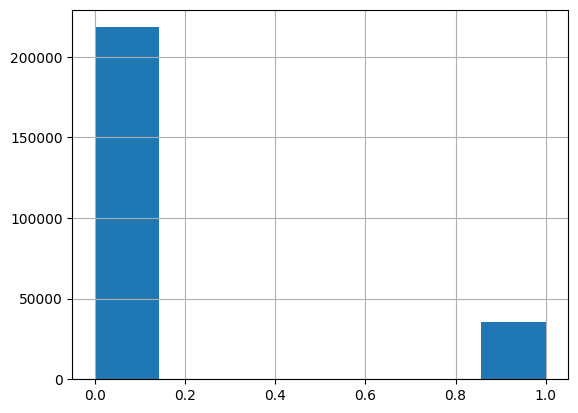

In [ ]:
cleaned_df['Diabetes_binary'].hist(bins=7)

In [ ]:
x = cleaned_df.drop(columns=['Diabetes_binary'])
y = cleaned_df['Diabetes_binary']

In [ ]:
y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,1.0
253677,0.0
253678,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=38)
#define cat and num columns
cat_columns=x.select_dtypes(include='object').columns
num_columns=x.select_dtypes(exclude='object').columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
#categorical_transformer = OneHotEncoder(handle_unknown="ignore")
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
#numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer([
        ("cat", categorical_transformer, cat_columns)
    ],remainder='passthrough')


In [ ]:
#setup a results df to hold training and test scores
#at this point, you should already decide what scoring metric you going to use
#regression: r2, mae, rmse, mape
results = pd.DataFrame(['cv_mae_test', 'cv_std_test', 'cv_mae_train', 'cv_std_train','best parameter'])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit

In [ ]:
#define model
regressor = DecisionTreeRegressor(random_state=38)
#create pipeline
pipe = Pipeline([
   ('preprocessor',preprocessor),
   ('regressor',regressor)
])
#define cv, to reduce effect or a 'lucky' or 'unlucky' split
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=38)

#define a small parameter grid. This is enough for a first pass.
#do not scan too many parameters because tree models can overfit easily,
#and the goal here is to test the process, not to chase the perfect score.

#as the proposed engineered features may not be perfectly tuned yet,
#there is no benefit in running a large or expensive grid search.
#A small grid helps you compare model behaviour without wasting time.
#The max depth here represents an underfitted, 2 attempts at balanced,
#and an overfitted tree.

param_grid = {
  'regressor__max_depth':[1, 5, 10, None],
  'regressor__min_samples_split':[2,5,10],
  'regressor__criterion':['squared_error', 'absolute_error']
}
#we will ask algo to score every single para combination
#None and 2, None and 5, None and 10, 1 and 2, .....
grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring='neg_mean_absolute_error',n_jobs=-1)
grid_search.fit(X_train, y_train)
#run cross validation
scores_train = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
scores_test = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=cv, scoring='neg_mean_absolute_error')
mean_score_test = scores_test.mean()
std_score_test = scores_test.std()
mean_score_train = scores_train.mean()
std_score_train = scores_train.std()
#good practice to define new scores as new df, then concat to existing results df
results_in = pd.DataFrame([mean_score_test,
                           std_score_test,
                           mean_score_train,
                           std_score_train,
                           grid_search.best_params_],
                         columns=['Baseline DTR'])
results = pd.concat([results, results_in], axis=1)
display(results)

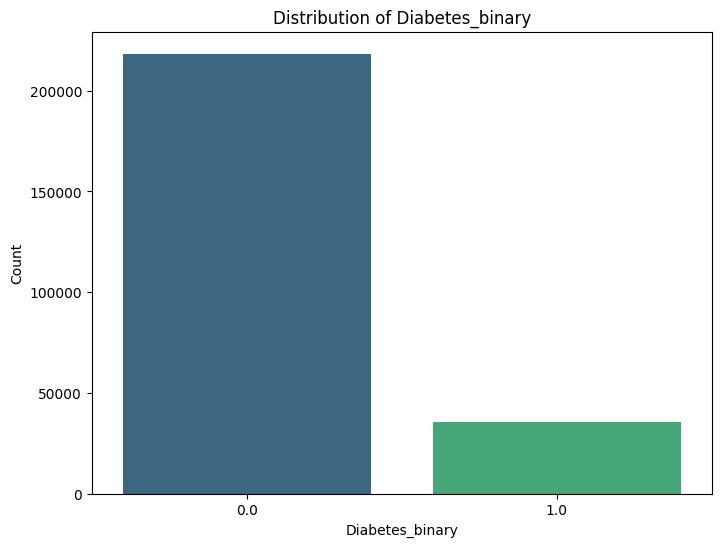

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=cleaned_df, palette='viridis', hue='Diabetes_binary', legend=False)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (from original cell 0pSj9twSjMVe)
brfss_2015_dataset = pd.read_csv('/content/sample_data/diabetes_binary_health_indicators_BRFSS2015.csv')

# Create a working DataFrame, which already has the renamed columns
brfss_df_working = brfss_2015_dataset.copy()

# Apply modifications based on original cells, using the existing column names
# SM8EymhJuHit: Diabetes_binary (originally intended as DIABETE3)
# Going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Note: The 'Diabetes_binary' column currently contains 0.0 (no diabetes) and 1.0 (diabetes).
# To align with the desired 0, 1, 2 scale, we will map 1.0 to 2.0. The pre-diabetes category (1) cannot be derived from this binary column.
brfss_df_working['Diabetes_binary'] = brfss_df_working['Diabetes_binary'].replace({1:2})

# nbl3eoieuK5f: HighChol (originally TOLDHI2)
# Change 2 to 0 because it is No
# Remove all 7 (dont knows) and 9 (refused)
brfss_df_working['HighChol'] = brfss_df_working['HighChol'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.HighChol != 7]
brfss_df_working = brfss_df_working[brfss_df_working.HighChol != 9]

# UubLULEOuSt5: CholCheck (originally _CHOLCHK)
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
brfss_df_working['CholCheck'] = brfss_df_working['CholCheck'].replace({3:0,2:0})
brfss_df_working = brfss_df_working[brfss_df_working.CholCheck != 9]

# XFoZt-c9uW87: BMI (originally _BMI5)
brfss_df_working['BMI'] = brfss_df_working['BMI'].div(100).round(0)

# mcEk_SnMua8l: Smoker (originally SMOKE100)
# Change 2 to 0 because it is No
# Remove all 7 (dont knows) and 9 (refused)
brfss_df_working['Smoker'] = brfss_df_working['Smoker'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.Smoker != 7]
brfss_df_working = brfss_df_working[brfss_df_working.Smoker != 9]

# maXnoLEsudz-: HeartDiseaseorAttack (originally _MICHD)
# Change 2 to 0 because this means did not have MI or CHD
brfss_df_working['HeartDiseaseorAttack'] = brfss_df_working['HeartDiseaseorAttack'].replace({2: 0})

# 27rXL24VuhqN: PhysActivity (originally _TOTINDA)
# 1 for physical activity, change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
brfss_df_working['PhysActivity'] = brfss_df_working['PhysActivity'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.PhysActivity != 9]

# vhke4Mluuhpi: Fruits (originally _FRTLT1)
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day
# remove all dont knows and missing 9
brfss_df_working['Fruits'] = brfss_df_working['Fruits'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.Fruits != 9]

# 4ig8Bc5Oupsa: Veggies (originally _VEGLT1)
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day
# remove all dont knows and missing 9
brfss_df_working['Veggies'] = brfss_df_working['Veggies'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.Veggies != 9]

# PsWUjM0Kuprl: HvyAlcoholConsump (originally _RFDRHV5)
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_df_working['HvyAlcoholConsump'] = brfss_df_working['HvyAlcoholConsump'].replace({1:0, 2:1})
brfss_df_working = brfss_df_working[brfss_df_working.HvyAlcoholConsump != 9]

# jRDGsP8QuvaI: AnyHealthcare (originally HLTHPLN1)
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
brfss_df_working['AnyHealthcare'] = brfss_df_working['AnyHealthcare'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.AnyHealthcare != 7]
brfss_df_working = brfss_df_working[brfss_df_working.AnyHealthcare != 9]

# O6cw36xlux9w: NoDocbcCost (originally MEDCOST)
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
brfss_df_working['NoDocbcCost'] = brfss_df_working['NoDocbcCost'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.NoDocbcCost != 7]
brfss_df_working = brfss_df_working[brfss_df_working.NoDocbcCost != 9]

# z__Pv9ZPu3b1: GenHlth (originally GENHLTH)
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_df_working = brfss_df_working[brfss_df_working.GenHlth != 7]
brfss_df_working = brfss_df_working[brfss_df_working.GenHlth != 9]

# 5vYEOWWhu3bB: MentHlth (originally MENTHLTH)
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_working['MentHlth'] = brfss_df_working['MentHlth'].replace({88:0})
brfss_df_working = brfss_df_working[brfss_df_working.MentHlth != 77]
brfss_df_working = brfss_df_working[brfss_df_working.MentHlth != 99]

# MnSOtivpu95p: PhysHlth (originally PHYSHLTH)
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_working['PhysHlth'] = brfss_df_working['PhysHlth'].replace({88:0})
brfss_df_working = brfss_df_working[brfss_df_working.PhysHlth != 77]
brfss_df_working = brfss_df_working[brfss_df_working.PhysHlth != 99]

# CyLH3CtEvBsu: DiffWalk (originally DIFFWALK)
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
brfss_df_working['DiffWalk'] = brfss_df_working['DiffWalk'].replace({2:0})
brfss_df_working = brfss_df_working[brfss_df_working.DiffWalk != 7]
brfss_df_working = brfss_df_working[brfss_df_working.DiffWalk != 9]

# o3yot-k0vBr1: Sex (originally SEX)
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
brfss_df_working['Sex'] = brfss_df_working['Sex'].replace({2:0})

# uoIHRWUdvHup: Age (originally _AGEG5YR)
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_df_working = brfss_df_working[brfss_df_working.Age != 14]

# KBuXySwNvJHt: Education (originally EDUCA)
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
brfss_df_working = brfss_df_working[brfss_df_working.Education != 9]

# NIwzFd0NvMgf: Income (originally INCOME2)
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_df_working = brfss_df_working[brfss_df_working.Income != 77]
brfss_df_working = brfss_df_working[brfss_df_working.Income != 99]

# Rename Diabetes_binary to Diabetes_012 to match the desired target name
brfss = brfss_df_working.rename(columns={'Diabetes_binary': 'Diabetes_012'})


In [ ]:
#generate a preview of ten rows as text first, so that we can use it for sending to LLM API later.
data_preview = df.head(10).to_string()
print(data_preview)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0                   0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0
3              0.0     1.0       0.0        

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
#Check the shape of the dataset now: We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
brfss_df_working.shape

(253680, 22)

In [ ]:
#Let's see what the data looks like after Modifying Values
brfss_df_working.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#Check Class Sizes of the heart disease column
brfss_df_working.groupby(['Diabetes_binary']).size()

,0
Diabetes_binary,
0.0,218334
2.0,35346


In [ ]:
#Rename the columns to make them more readable
brfss = brfss_df_working.rename(columns = {'Diabetes_binary':'Diabetes_012',
                                         'HighBP':'HighBP',
                                         'HighChol':'HighChol', 'CholCheck':'CholCheck',
                                         'BMI':'BMI',
                                         'Smoker':'Smoker',
                                         'Stroke':'Stroke', 'HeartDiseaseorAttack':'HeartDiseaseorAttack',
                                         'PhysActivity':'PhysActivity',
                                         'Fruits':'Fruits', 'Veggies':"Veggies",
                                         'HvyAlcoholConsump':'HvyAlcoholConsump',
                                         'AnyHealthcare':'AnyHealthcare', 'NoDocbcCost':'NoDocbcCost',
                                         'GenHlth':'GenHlth', 'MentHlth':'MentHlth', 'PhysHlth':'PhysHlth', 'DiffWalk':'DiffWalk',
                                         'Sex':'Sex', 'Age':'Age', 'Education':'Education', 'Income':'Income' })

In [ ]:
#Check how many respondents have no diabetes, prediabetes or diabetes. Note the class imbalance!
brfss.groupby(['Diabetes_012']).size()

,0
Diabetes_012,
0.0,218334
2.0,35346


In [ ]:
#************************************************************************************************
brfss.to_csv('diabetes_012_health_indicators_BRFSS2015.csv', sep=",", index=False)
#************************************************************************************************